In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('/content/drive/MyDrive/manufacturing.csv')
data.head()


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [3]:
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, -1].values


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [6]:
model = LinearRegression()
model.fit(X_poly_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_poly_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.4697918263612606


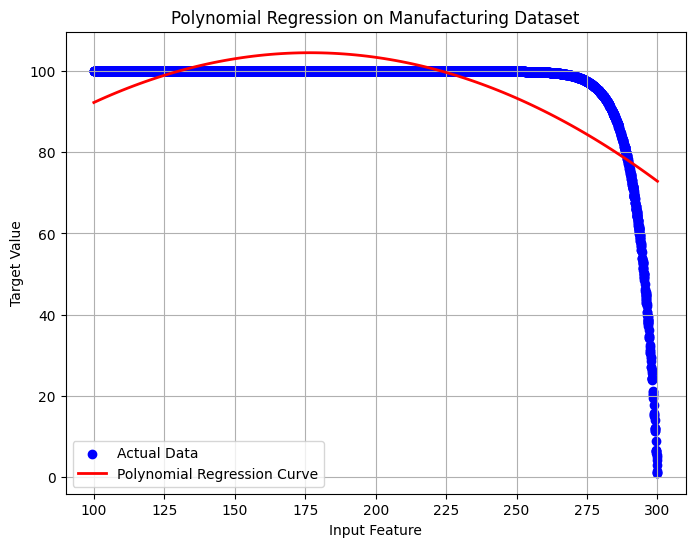

In [8]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_poly_line = poly.transform(X_line)
y_line = model.predict(X_poly_line)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.title('Polynomial Regression on Manufacturing Dataset')
plt.legend()
plt.grid(True)
plt.show()
